<a href="https://colab.research.google.com/github/kjbhardwaj99/Yes-Bank-Stock-Prediction-/blob/main/ML_Project_Linear_Regression_YesBank_StockPrices_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Importing numpy for numerical operations
import pandas as pd  # Importing pandas for data manipulation
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced visualization

from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler for feature scaling
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model

from sklearn.linear_model import Lasso  # Importing Lasso model for regularization
from sklearn.linear_model import Ridge  # Importing Ridge model for regularization

from sklearn.metrics import r2_score  # Importing r2_score for model evaluation
from sklearn.metrics import mean_squared_error  # Importing mean_squared_error for model evaluation

import warnings  # Importing warnings to handle warnings
warnings.filterwarnings('ignore')  # Ignoring warnings for cleaner output


In [2]:
#loading Data
df=pd.read_csv('/content/drive/MyDrive/data sci/project/Linear Regression/Yes Bank Stock Price /data_YesBank_StockPrices.csv')

# **Exploratory Data Analysis**

In [3]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
# Adding a new column 'month' to the DataFrame by extracting the month part from the 'Date' column
df['month'] = df['Date'].apply(lambda x: x[:-3])

# Adding a new column 'year' to the DataFrame by converting the year part from the 'Date' column to an integer
df['year'] = df['Date'].apply(lambda x: int(x[4:]))


In [5]:
df.head()

,Date,Open,High,Low,Close,month,year
0,Jul-05,13.00,14.00,11.25,12.46,Jul,5
1,Aug-05,12.58,14.88,12.55,13.42,Aug,5
2,Sep-05,13.48,14.87,12.27,13.30,Sep,5
3,Oct-05,13.20,14.47,12.40,12.99,Oct,5
4,Nov-05,13.35,13.88,12.88,13.41,Nov,5


In [6]:
# Generate descriptive statistics for the DataFrame 'df'
df.describe()


,Open,High,Low,Close,year
count,185.000000,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703,12.702703
std,98.879850,106.333497,91.219415,98.583153,4.471315
min,10.000000,11.240000,5.550000,9.980000,5.000000
25%,33.800000,36.140000,28.510000,33.450000,9.000000
50%,62.980000,72.550000,58.000000,62.540000,13.000000
75%,153.000000,169.190000,138.350000,153.300000,17.000000
max,369.950000,404.000000,345.500000,367.900000,20.000000


In [7]:
plt.style.use(plt.style.available[24]) #setting Plot Style

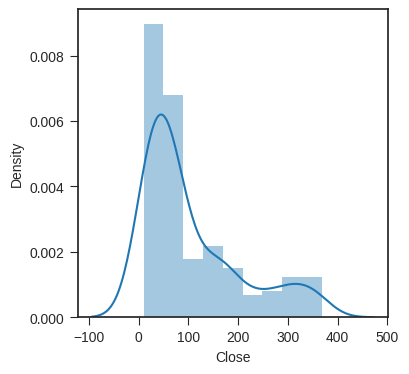

In [8]:
plt.figure(figsize=(4, 4))

# Create a distribution plot of the 'Close' column from DataFrame df
sns.distplot(df['Close'])  # Plot the distribution of 'Close' column data

# Display the plot
plt.show()  # Show the plot

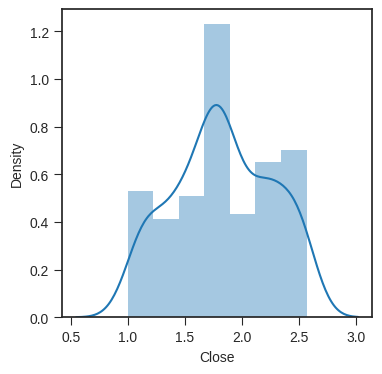

In [9]:
plt.figure(figsize=(4, 4))

# Create a distribution plot of the logarithm (base 10) of the 'Close' column from DataFrame df
sns.distplot(np.log10(df['Close']))  # Plot the distribution of log-transformed 'Close' column data

# Display the plot
plt.show()  # Show the plot

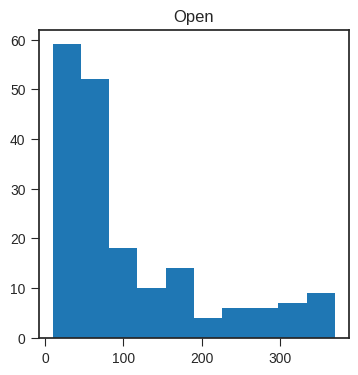

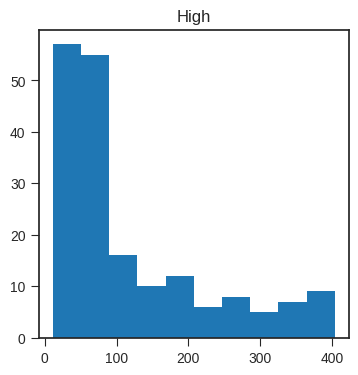

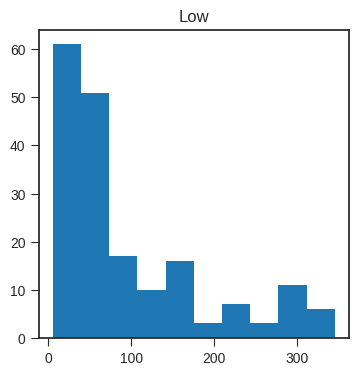

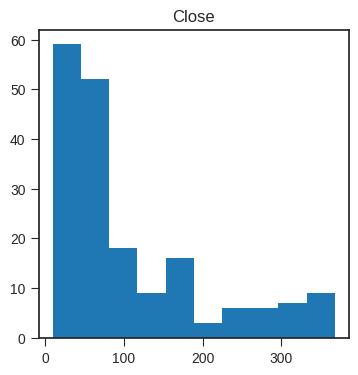

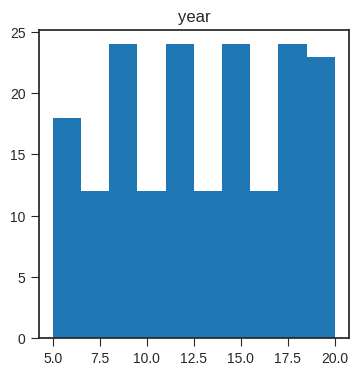

In [10]:
# Iterate through the columns of the DataFrame's descriptive statistics and create histograms
for i in df.describe().columns.to_list():  # Loop through columns in the DataFrame's descriptive statistics
    fig = plt.figure(figsize=(4, 4))  # Create a new figure with a specific size
    ax = plt.gca()  # Get the current Axes instance
    ax.hist(df[i])  # Plot a histogram of the current column
    ax.set_title(i)  # Set the title of the histogram to the column name


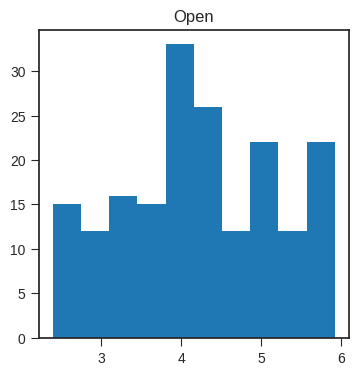

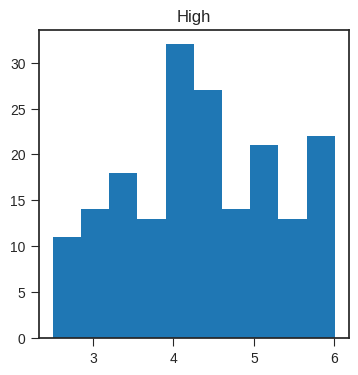

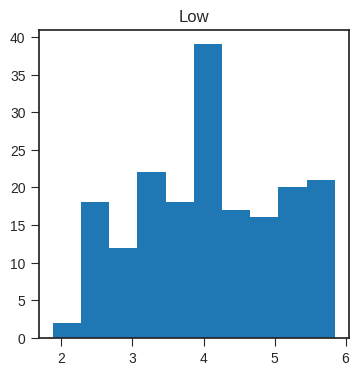

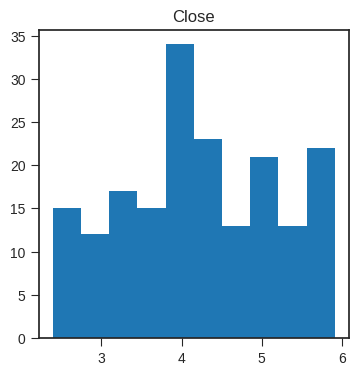

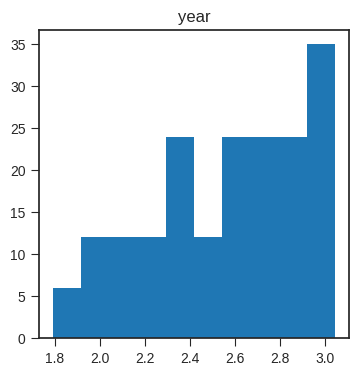

In [11]:
# Iterate through the columns of the DataFrame's descriptive statistics and create histograms
for i in df.describe().columns.to_list():  # Loop through columns in the DataFrame's descriptive statistics
    fig = plt.figure(figsize=(4, 4))  # Create a new figure with a specific size
    ax = plt.gca()  # Get the current Axes instance
    ax.hist(np.log1p(df[i]))  # Plot a histogram of the logarithm (base 1p) of the current column
    ax.set_title(i)  # Set the title of the histogram to the column name


In [12]:
# Define the dependent variable
dependent_variable = 'Close'

# Get a list of numerical features by excluding 'Close', 'month', and 'Date' from DataFrame columns
# Convert the column names to a set and subtract the set containing 'Close', 'month', and 'Date'
num_feature = list(set(df.columns.to_list()) - {dependent_variable, 'month', 'Date'})

# Display the list of numerical features
num_feature


['Open', 'Low', 'year', 'High']

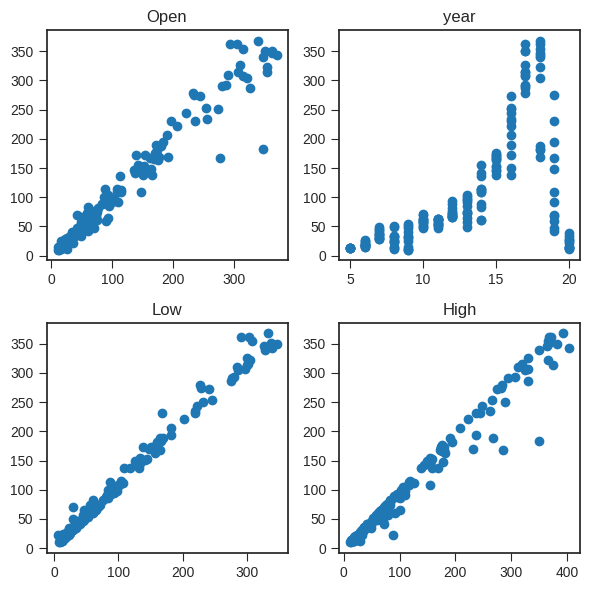

In [13]:
# Create subplots with 2 rows and 2 columns, and set the figure size and layout
fig, ax = plt.subplots(2, 2, figsize=(6, 6), tight_layout=True)

# Initialize row and column indices
r, c = 0, 0

# Iterate through numerical features
for i in num_feature:  # Loop through numerical features
    ax[r, c].scatter(df[i], df[dependent_variable])  # Create a scatter plot of the current feature against y
    ax[r, c].set_title(i)  # Set the title of the subplot to the feature name
    r = r + 1  # Move to the next row
    if r == 2:  # If reached the end of the row
        r = 0  # Reset row index
        c = c + 1  # Move to the next column


<Axes: xlabel='month'>

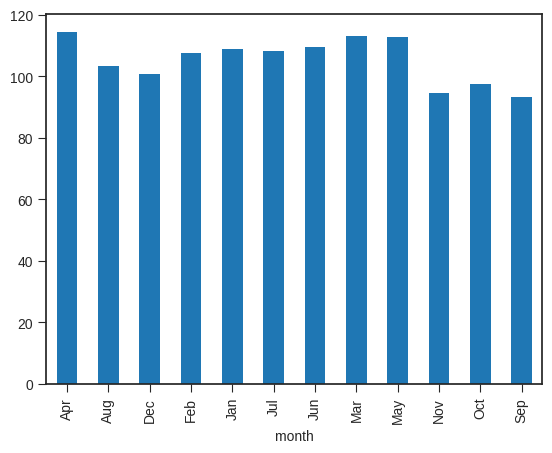

In [14]:
# Group DataFrame df by 'month' and calculate the mean of 'Close', then plot it as a bar plot
df.groupby('month')['Close'].mean().plot(kind='bar')  # Plot the mean 'Close' for each month as a bar plot


# **Data Prepration**

In [15]:
# Convert categorical variables into dummy/indicator variables
# Using one-hot encoding for the 'month' column and dropping the first category to avoid multicollinearity
# Convert the dummy variables to integer dtype for better memory usage
df = pd.get_dummies(df, columns=['month'], drop_first=True, dtype=int)


In [16]:
# Define a list of features to be used in the analysis/modeling
features = ['month_Jun', 'month_Sep', 'month_Aug', 'year', 'month_Mar', 'month_Oct', 'month_Jul', 'month_Jan',
            'month_Dec', 'Open', 'High', 'month_Feb', 'month_May', 'month_Nov', 'Low']

# Print the list of features
print(features)


['month_Jun', 'month_Sep', 'month_Aug', 'year', 'month_Mar', 'month_Oct', 'month_Jul', 'month_Jan', 'month_Dec', 'Open', 'High', 'month_Feb', 'month_May', 'month_Nov', 'Low']


In [17]:
# Create a copy of the DataFrame df
df_copy = df.copy()


In [18]:
# Prepare the features (X) and target variable (y) for modeling
# Take the logarithm (base 1p) of the selected features and convert them to a NumPy array
X = np.log1p(df_copy[features])

# Take the logarithm (base 10) of the 'Close' column and convert it to a NumPy array as the target variable
y = np.log10(df_copy['Close'])


In [19]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


# **Regression Model**




---

## **Simple Linear regression**

---



MSE : 72.32355462928967 
R2 score : 0.9935276083155469


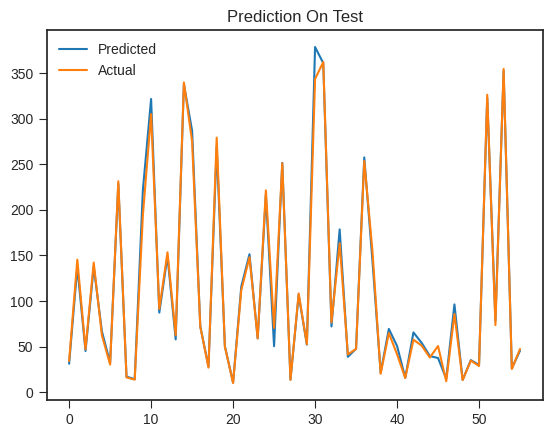

In [20]:
# Train a linear regression model using the training data
model = LinearRegression().fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R-squared (R2) score
print(f'MSE : {mean_squared_error(10**y_pred, 10**y_test)} \nR2 score : {r2_score(10**y_test, 10**y_pred)}')

# Plot the predicted vs actual values on a graph
plt.title(f'Prediction On Test')
plt.plot(10**(np.array(y_pred)), label='Predicted')
plt.plot(10**(np.array(y_test)), label='Actual')
plt.legend()
plt.show()

# Create a dictionary to store evaluation metrics
simpleR_matrix = {'MSE': mean_squared_error(10**y_pred, 10**y_test),
                  'RMSE': np.sqrt(mean_squared_error(10**y_pred, 10**y_test)),
                  'R2_score': r2_score(10**y_test, 10**y_pred)}


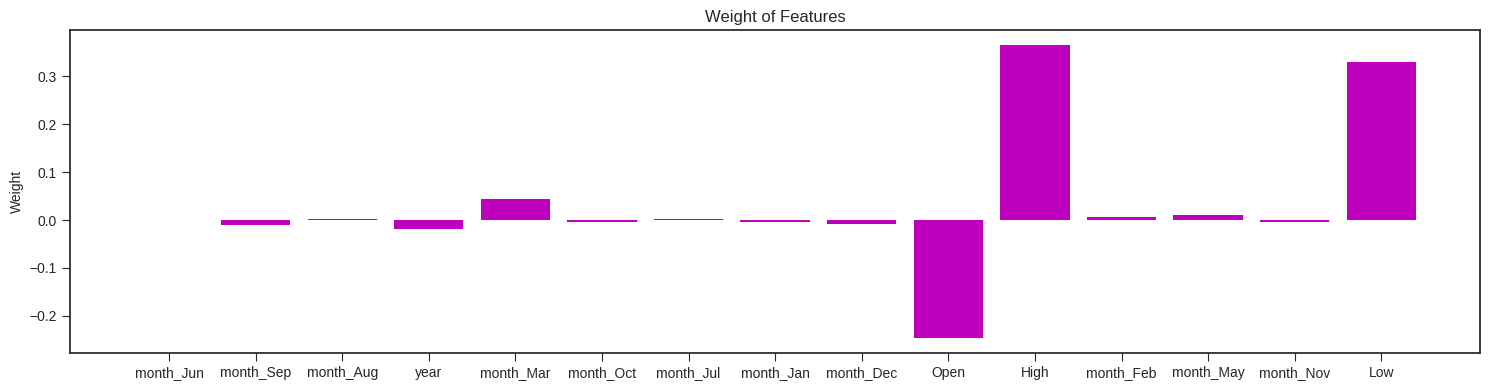

In [21]:
plt.figure(figsize=(15,4))
plt.bar(df_copy[features].columns.to_list(),list(model.coef_),color='m')
plt.title('Weight of Features')

plt.ylabel('Weight')
plt.tight_layout()

---

## **Lasso Regression**

---



In [22]:
# Import the GridSearchCV class from sklearn.model_selection
from sklearn.model_selection import GridSearchCV


In [23]:
# Define the parameters for Lasso regression models
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Initialize a GridSearchCV object for Lasso regression
lasso_model = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
lasso_model.fit(X_train, y_train)

# Find the best parameters determined by GridSearchCV
lasso_model.best_params_


{'alpha': 0.0001}

MSE : 67.66449149219962 
R2 score : 0.9939445579754524


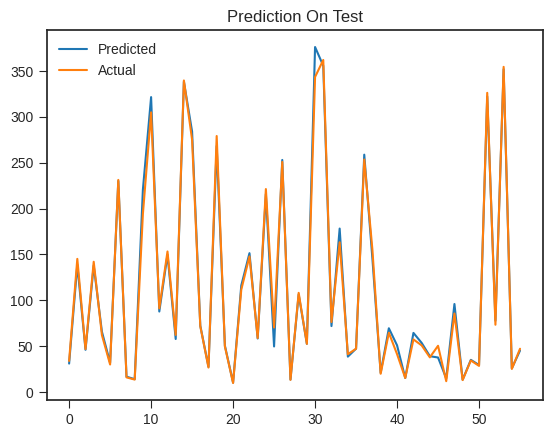

In [24]:
# Initialize and train a Lasso regression model with specified alpha and fit_intercept parameters
lasso_model = Lasso(alpha=0.0001, fit_intercept=True)
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R-squared (R2) score
print(f'MSE : {mean_squared_error(10**y_pred, 10**y_test)} \nR2 score : {r2_score(10**y_test, 10**y_pred)}')

# Plot the predicted vs actual values on a graph
plt.title(f'Prediction On Test')
plt.plot(10**(np.array(y_pred)), label='Predicted')
plt.plot(10**(np.array(y_test)), label='Actual')
plt.legend()
plt.show()

# Create a dictionary to store evaluation metrics
lasso_matrix = {'MSE': mean_squared_error(10**y_pred, 10**y_test),
                'RMSE': np.sqrt(mean_squared_error(10**y_pred, 10**y_test)),
                'R2_score': r2_score(10**y_test, 10**y_pred)}


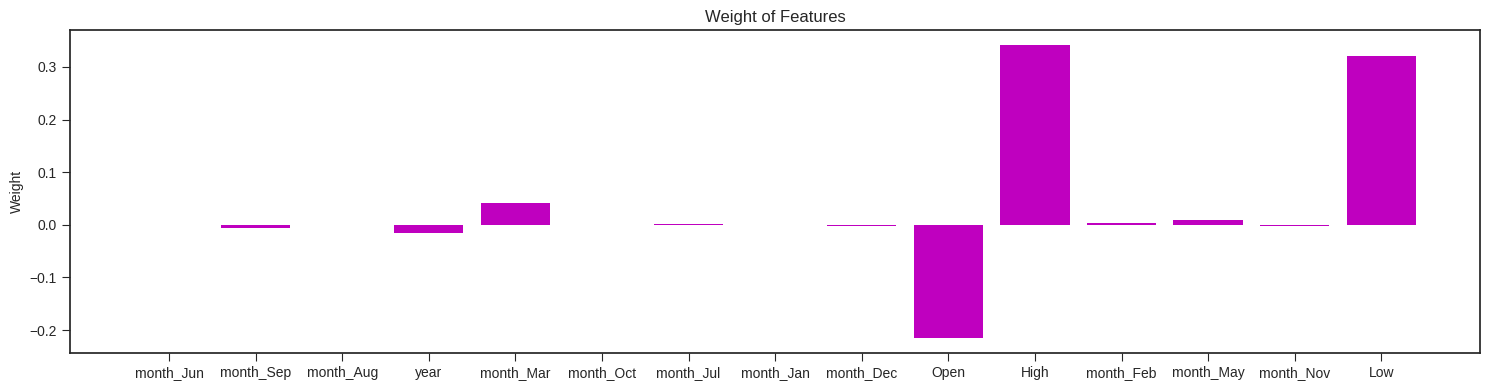

In [25]:
plt.figure(figsize=(15,4))
plt.bar(df_copy[features].columns.to_list(),list(lasso_model.coef_),color='m')
plt.title('Weight of Features')

plt.ylabel('Weight')
plt.tight_layout()

---

## **Ridge**

---



In [26]:
# Define the parameters for Ridge regression models
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Initialize a GridSearchCV object for Ridge regression
ridge_model = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
ridge_model.fit(X_train, y_train)

# Find the best parameters determined by GridSearchCV
ridge_model.best_params_


{'alpha': 0.1}

MSE : 72.31935020342804
RMSE : 8.504078445277186
R2 score : 0.9935279845787314


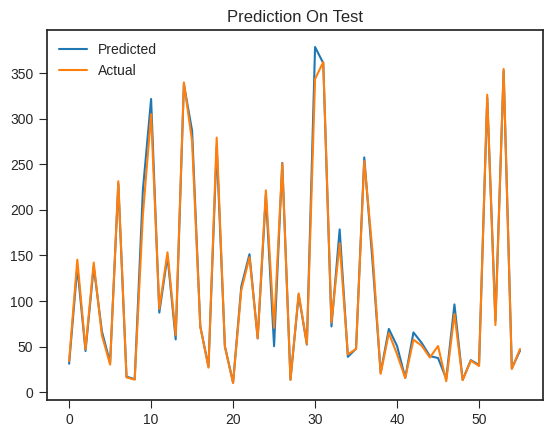

In [27]:
# Initialize and train a Ridge regression model with specified alpha and max_iter parameters
ridge_model = Ridge(alpha=0.0001, max_iter=3000).fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score
print(f'MSE : {mean_squared_error(10**y_pred,10**y_test)}\nRMSE : {np.sqrt(mean_squared_error(10**y_pred,10**y_test))}\nR2 score : {r2_score(10**y_test,10**y_pred)}')

# Plot the predicted vs actual values on a graph
plt.title(f'Prediction On Test')
plt.plot(10**(np.array(y_pred)),label='Predicted')
plt.plot(10**(np.array(y_test)),label='Actual')
plt.legend()
plt.show()

# Create a dictionary to store evaluation metrics
ridge_matrix = {'MSE' : mean_squared_error(10**y_pred,10**y_test),
                'RMSE' : np.sqrt(mean_squared_error(10**y_pred,10**y_test)),
                'R2_score' : r2_score(10**y_test,10**y_pred)}


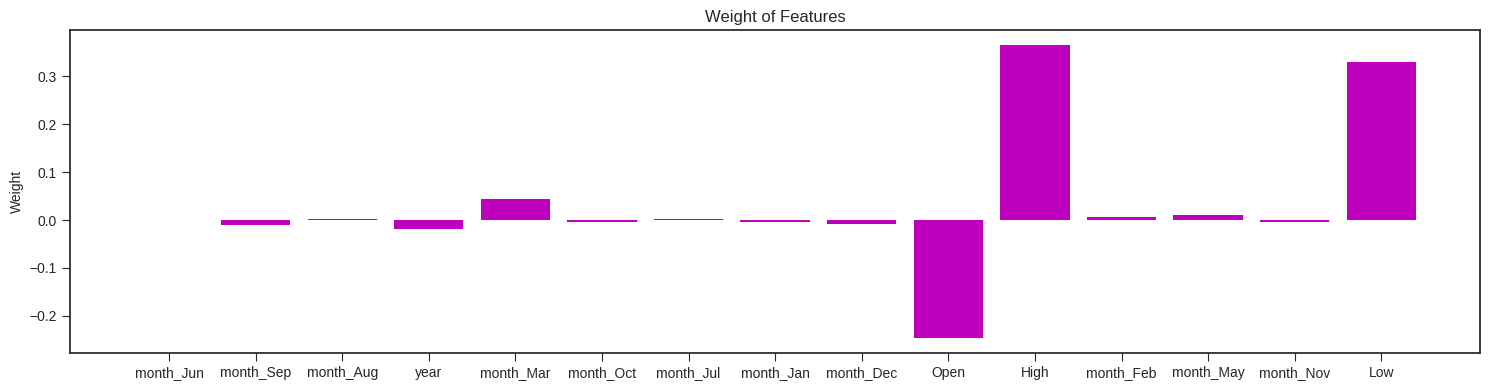

In [28]:
plt.figure(figsize=(15,4))
plt.bar(df_copy[features].columns.to_list(),list(ridge_model.coef_),color='m')
plt.title('Weight of Features')

plt.ylabel('Weight')
plt.tight_layout()


# **Model Selection**




In [29]:
# Create a DataFrame to store evaluation metrics for different regression models
evaluation_metrics_df = pd.DataFrame([simpleR_matrix, lasso_matrix, ridge_matrix],
                                     index=('Simple Linear Regression', 'Lasso Regression', 'Ridge Regression'))

print(evaluation_metrics_df)

                                MSE      RMSE  R2_score
Simple Linear Regression  72.323555  8.504326  0.993528
Lasso Regression          67.664491  8.225843  0.993945
Ridge Regression          72.319350  8.504078  0.993528


**The Cross-Validated Lasso Regression model emerged as the best-performing model in our analysis, showcasing its effectiveness in predicting the target variable. With an impressive R-squared score of 0.993945, indicating a high level of variance explained by the model, and a low Root Mean Squared Error (RMSE) of 8.225843, suggesting accurate predictions with minimal deviation from the actual values, the model demonstrated remarkable performance. Furthermore, the Mean Squared Error (MSE) of 67.664491 reinforces the model's proficiency in minimizing prediction errors. These results underscore the effectiveness of Lasso Regression, particularly when augmented with cross-validation, in capturing complex relationships within the data and making accurate predictions.**

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor


In [31]:
estimators=[('lr',LinearRegression()),('LR',Lasso(alpha=0.0001, fit_intercept=True)),('rf',Ridge(alpha=0.0001, max_iter=3000))]

In [32]:
vr=VotingRegressor(estimators=estimators)

In [33]:
vr

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('LR', Lasso(alpha=0.0001)),
                            ('rf', Ridge(alpha=0.0001, max_iter=3000))])

In [34]:
voting_model=vr.fit(X_train,y_train)

MSE : 70.5289405359831
RMSE : 8.398151018884043
R2 score : 0.9936882122210636


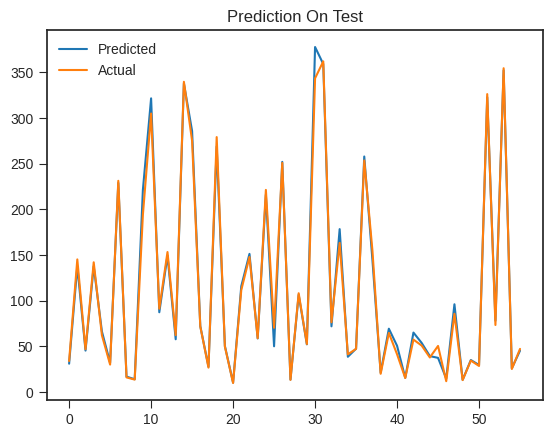

In [35]:
# Make predictions on the test data
y_pred = voting_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score
print(f'MSE : {mean_squared_error(10**y_pred,10**y_test)}\nRMSE : {np.sqrt(mean_squared_error(10**y_pred,10**y_test))}\nR2 score : {r2_score(10**y_test,10**y_pred)}')

# Plot the predicted vs actual values on a graph
plt.title(f'Prediction On Test')
plt.plot(10**(np.array(y_pred)),label='Predicted')
plt.plot(10**(np.array(y_test)),label='Actual')
plt.legend()
plt.show()

# Create a dictionary to store evaluation metrics
ridge_matrix = {'MSE' : mean_squared_error(10**y_pred,10**y_test),
                'RMSE' : np.sqrt(mean_squared_error(10**y_pred,10**y_test)),
                'R2_score' : r2_score(10**y_test,10**y_pred)}


**Bagging**

Mean Squared Error: 0.00
R-squared: 0.9923616935877722


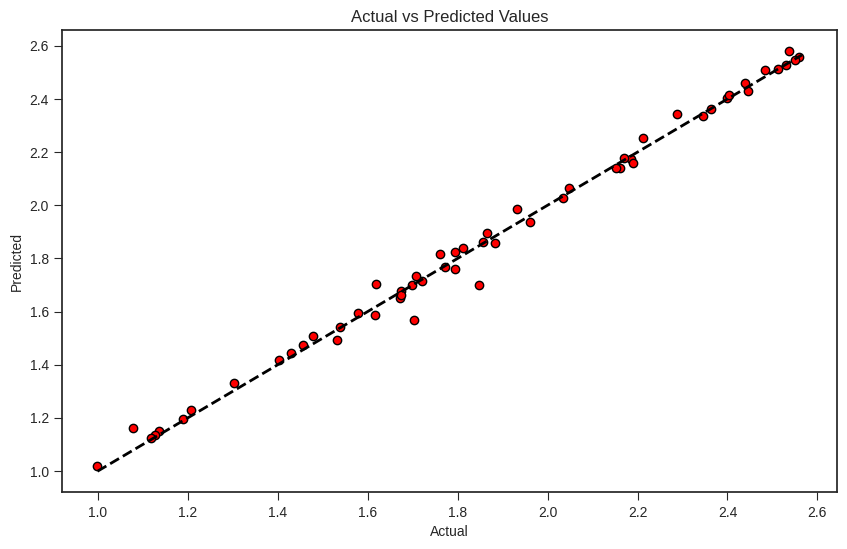

In [36]:
from sklearn.ensemble import BaggingRegressor
# Define the base model
base_model = LinearRegression()

# Create a Bagging Regressor
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=50, random_state=42)

# Fit the Bagging Regressor
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()